<a href="https://colab.research.google.com/github/seyitozztrk/trump-s-tweets-eda/blob/main/trump_tweet_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trump_insult_tweets_2014_to_2021.csv to trump_insult_tweets_2014_to_2021 (1).csv


In [ ]:
import io
trump_data = pd.read_csv(io.BytesIO(uploaded['trump_insult_tweets_2014_to_2021.csv']))

In [ ]:
trump_data.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [ ]:
trump_data.shape

(10360, 5)

In [ ]:
trump_data.date.unique().shape

(1573,)

In [ ]:
trump_data.target.unique().shape

(867,)

In [ ]:
trump_data['tweet'].describe()

count                                                 10360
unique                                                 5673
top       The Fake News Networks, those that knowingly h...
freq                                                     16
Name: tweet, dtype: object

In [ ]:
trump_data['insult'].describe()

count         10360
unique         6729
top       Fake News
freq            431
Name: insult, dtype: object

In [ ]:
trump_data['target'].describe()

count         10358
unique          866
top       the-media
freq           1287
Name: target, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


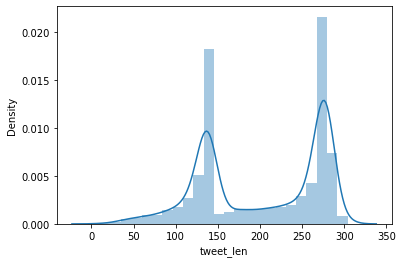

In [ ]:
trump_data['tweet_len'] = trump_data['tweet'].apply(len)

sb.distplot(trump_data['tweet_len'])

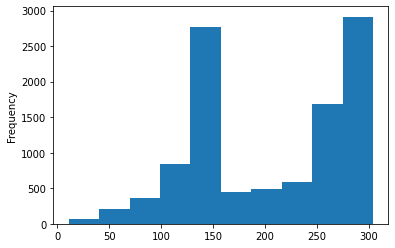

In [ ]:
trump_data['tweet_len'].plot(kind="hist")

In [ ]:
# EDA of Trump Analysis
# check null values

In [ ]:
trump_data['date'] = pd.to_datetime(trump_data['date'])
trump_data['year'] = trump_data['date'].dt.year
trump_data['month'] = trump_data['date'].dt.month
trump_data['day'] = trump_data['date'].dt.day

trump_data.head()

,Unnamed: 0,date,target,insult,tweet,tweet_len,year,month,day
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",140,2014,10,9
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",140,2014,10,9
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,121,2015,6,16
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,140,2015,6,24
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",122,2015,6,24


In [ ]:
trump_data.shape

(10360, 9)

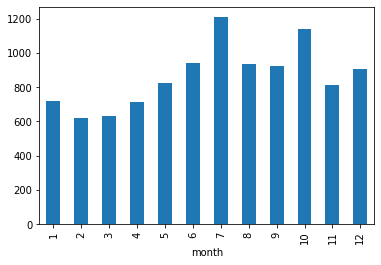

In [ ]:
trump_data.groupby(['month'])['tweet'].agg('count').plot(kind="bar")

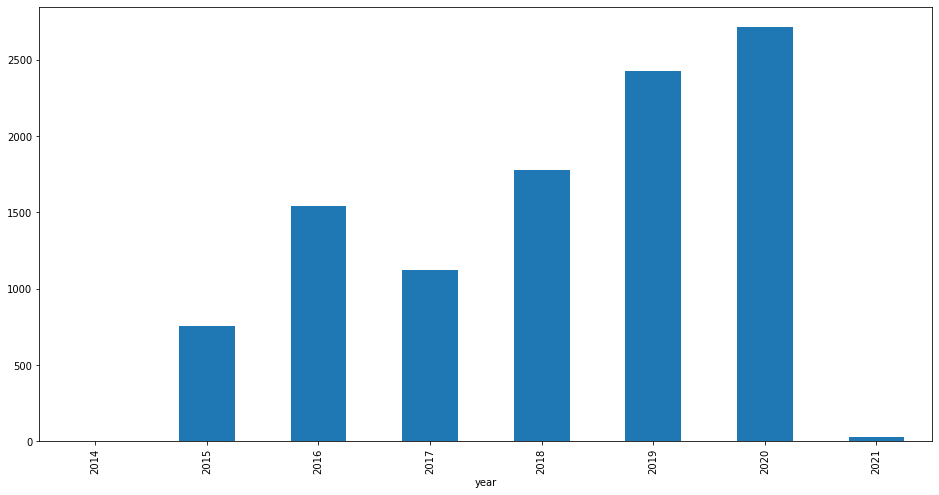

In [ ]:
plt.figure(figsize=(16,8))
trump_data.groupby(['year'])['tweet'].agg('count').plot(kind="bar")

In [ ]:
data_2020 = trump_data[trump_data['year']==2020]
# which day has most of the tweets about trump

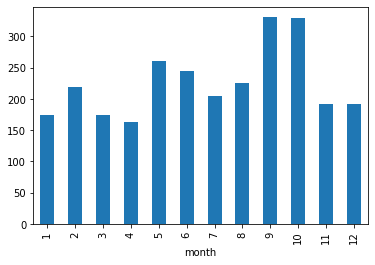

In [ ]:
data_2020.groupby(['month'])['tweet'].agg('count').plot(kind="bar")

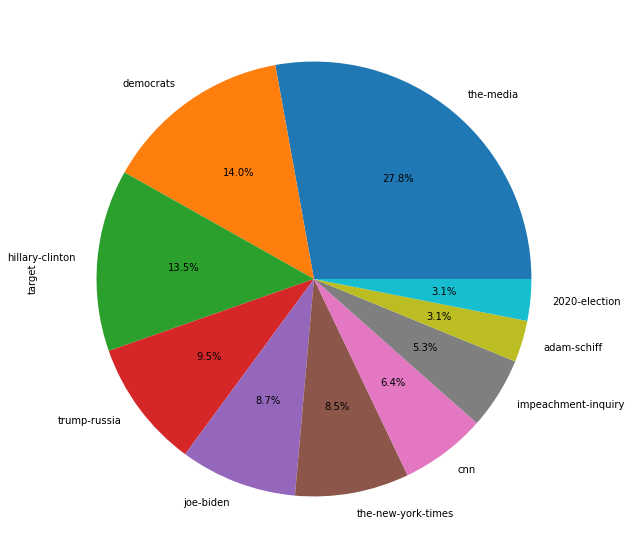

In [ ]:
# Top 10 tweet target

# EDA based on target

trump_data['target'].value_counts()[:10].sort_values(ascending=False).plot(kind="pie", figsize=(30, 10),autopct='%1.1f%%')

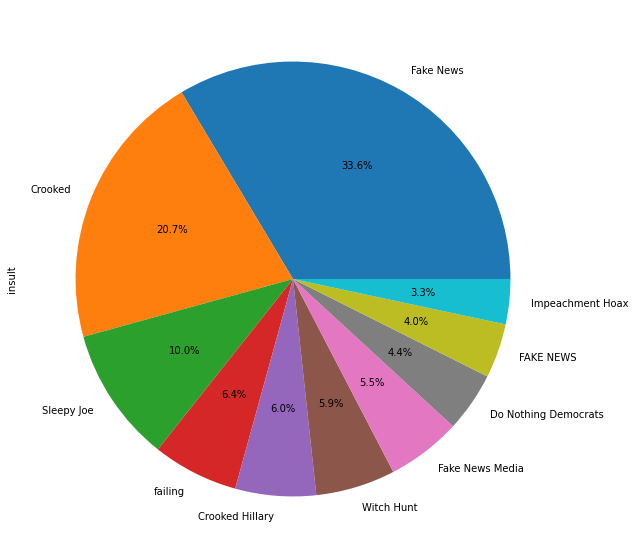

In [ ]:

trump_data['insult'].value_counts()[:10].sort_values(ascending=False).plot(kind="pie", figsize=(30, 10),autopct='%1.1f%%')

In [ ]:
trump_data.groupby('target')['insult'].count().sort_values(ascending=False)

target
the-media                           1287
democrats                            647
hillary-clinton                      625
trump-russia                         441
joe-biden                            402
                                    ... 
kristen-welker                         1
la-dodgers-relievers                   1
laws-about-sanctuary-cities            1
lebron-james                           1
judge-appointments-delay-tactics       1
Name: insult, Length: 866, dtype: int64

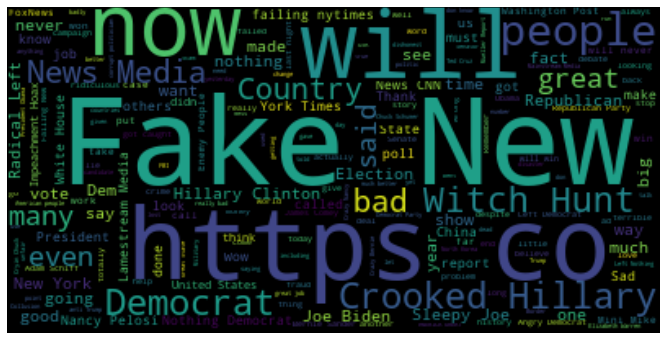

In [ ]:
import string 
from nltk.corpus import stopwords

tweet_text = ' '.join(trump_data['tweet'].dropna().tolist())


plt.subplots(figsize=(12,6))
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate(tweet_text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
b